In [5]:
from sklearn import datasets  
import matplotlib.pyplot as plt  
import pandas as pd
import seaborn as sns
#importing the necessary packages  
from sklearn.model_selection import train_test_split  
from sklearn.naive_bayes import GaussianNB   
#import for display
import matplotlib.pyplot as plt
import librosa.display
import IPython.display as ipd
import IPython

In [6]:
import librosa
import soundfile as sf

# Get example audio file
def get_mfcc_feature(data_path):
    """
    Converts a wave file into his mfcc features
    @args:
        data_path(str):
    @return:
        mfcc_features(np.array)
    """
    x, sr = librosa.load(data_path)
    x = librosa.util.fix_length(x, 45000)
    mfcc_features= librosa.feature.mfcc(y=x, sr=sr)
    return mfcc_features

 # Load the data

In [7]:
import os
data_dict = {}
data_raw={}
data_com = {}
'''Pre-process was inspired by Source: 
https://python.hotexamples.com/de/examples/sklearn.naive_bayes/GaussianNB/-/python-gaussiannb-class-examples.html
'''
'#Loop through paths'
for folder in ["svenja","gustav","hello"]:
    files = os.listdir(folder)
    '#Loop through folder'
    for file_path in files:
        single_dict = {}
        file_name = file_path.split("/")[-1]
        file_path_com = folder+"/"+file_path
        x, sr = librosa.load(file_path_com)
        data_raw[file_path] = ipd.Audio(x,rate=sr)
        single_dict["audio"] = ipd.Audio(x,rate=sr)
        single_dict["raw_data"]=x
        data_dict[file_name] = get_mfcc_feature(file_path_com).flatten()
        single_dict["feature_flatten"] = get_mfcc_feature(file_path_com).flatten()
        single_dict["feature"] = get_mfcc_feature(file_path_com)
        data_com[file_name]=single_dict
        
            

# Visualize data

svenja16_s.wav


svenja6.wav


gustav6.wav


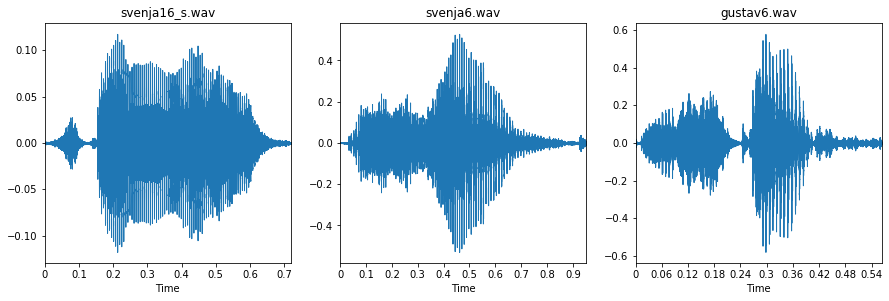

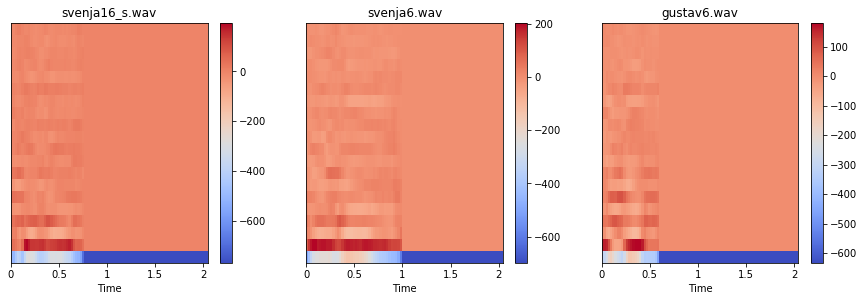

In [8]:
%matplotlib inline
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'last_expr'

plt.figure(figsize=(15, 15))
mfcc_features={}
for i,el in enumerate (['svenja16_s.wav','svenja6.wav',"gustav6.wav"]):
    plt.subplot(3, 3, i+1)
    plt.title(el)
    librosa.display.waveplot(data_com[el]["raw_data"], sr=sr) 
    print(el)
    IPython.display.display(data_com[el]["audio"])

plt.show()  
plt.figure(figsize=(15, 15))
for i,el in enumerate (['svenja16_s.wav','svenja6.wav',"gustav6.wav"]):
    plt.subplot(3, 3, i+1)
    plt.title(el)
    librosa.display.specshow(data_com[el]["feature"], x_axis='time')
    plt.colorbar()

In [9]:
print(data_dict.keys())
data_raw["gustav18_s.wav"]

dict_keys(['svenja16_s.wav', 'svenja14_s.wav', 'svenja3.wav', 'svenja21_s.wav', 'svenja_20_s.wav', 'svenja4.wav', 'svenja9.wav', 'sevenja5.wav', 'svenja6.wav', 'svenja8.wav', 'svenja11_s.wav', 'svenja1.wav', 'svenja17_s.wav', 'svenja19_s.wav', 'svenja18_s.wav', 'svenja13_s.wav', 'svenja22_s.wav', 'svenja2.wav', 'svenja7.wav', 'svenja12_s.wav', 'svenja10.wav', 'svenja15_s.wav', 'gustav8.wav', 'gustav18_s.wav', 'gustav13_s.wav', 'gustav14_s.wav', 'gustav17_s.wav', 'gustav11_s.wav', 'gustav15_s.wav', 'gustav9_s.wav', 'gustav2.wav', 'gustav19_s.wav', 'gustav16_s.wav', 'gustav3.wav', 'gustav5.wav', 'gustav6.wav', 'gustav20_s.wav', 'gustav4.wav', 'gustav1.wav', 'gustav12_s.wav', 'gustav7.wav', 'gustav10_s.wav', 'hello2.wav', 'hello1.wav', 'hello4.wav', 'hello.wav', 'hello3.wav'])


# Build classifier

In [10]:
import numpy as np
X = np.array([
              data_dict["gustav5.wav"],
              data_dict["gustav4.wav"],
              data_dict["gustav3.wav"],
              data_dict["gustav18_s.wav"],
              data_dict["gustav17_s.wav"],
              data_dict["gustav14_s.wav"],
              data_dict["svenja3.wav"],
             data_dict["svenja3.wav"]]
            )
Y = np.array([1,1,1,2,2,2,3,3])
from sklearn.naive_bayes import GaussianNB
clf = GaussianNB()
clf.fit(X, Y)
print(clf.predict([data_dict["gustav15_s.wav"]]))
print(clf.predict_log_proba([data_dict["gustav15_s.wav"]]))


[2]
[[-1.23110455e+04  0.00000000e+00 -5.42608557e+10]]
